# Jonathan Halverson
# Tuesday, December 19, 2017
# Simple RNN for time series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

This is an unusual example in that the number of inputs per output is 1. In real cases one would have multiple inputs corresponding to a single output.

In [2]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_outputs))

In [5]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(basic_cell, output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [6]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_op = optimizer.minimize(loss)

In [7]:
init = tf.global_variables_initializer()

In [8]:
t = np.linspace(0, 30, num=300)
f = t * np.sin(t) / 3.0 + 2.0 * np.sin(5.0 * t)

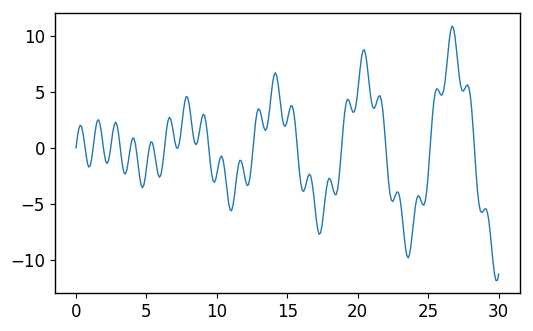

In [9]:
plt.plot(t, f)

In [10]:
def fetch_batch(batch_size):
     # could be done with numpy vector operations (see Geron)
     a_batch = []
     b_batch = []
     for _ in range(batch_size):
          rnd_index = np.random.choice(np.arange(1, 280))
          a_batch.append(f[rnd_index - 1: rnd_index + n_steps - 1].reshape(-1, 1))
          b_batch.append(f[rnd_index: rnd_index + n_steps].reshape(-1, 1))
     return np.asarray(a_batch), np.asarray(b_batch)

In [11]:
n_iterations = 1500
with tf.Session() as sess:
     init.run()
     for iteration in range(n_iterations + 1):
          X_batch, y_batch = fetch_batch(batch_size=50)
          sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
          if iteration % 100 == 0:
               mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
               print(iteration, "  MSE:", mse)
     idx = 100
     X_new = f[idx:idx + n_steps].reshape(1, n_steps, 1)
     X_target = f[idx + 1:idx + n_steps + 1]
     y_pred = sess.run(outputs, feed_dict={X:X_new})

(0, '  MSE:', 13.461719)
(100, '  MSE:', 0.40153554)
(200, '  MSE:', 0.13036196)
(300, '  MSE:', 0.065590486)
(400, '  MSE:', 0.058808051)
(500, '  MSE:', 0.058827363)
(600, '  MSE:', 0.052615978)
(700, '  MSE:', 0.050569654)
(800, '  MSE:', 0.041918967)
(900, '  MSE:', 0.044113349)
(1000, '  MSE:', 0.058697369)
(1100, '  MSE:', 0.046766855)
(1200, '  MSE:', 0.043785792)
(1300, '  MSE:', 0.042387709)
(1400, '  MSE:', 0.04496178)
(1500, '  MSE:', 0.044095919)


In [12]:
print outputs.shape, states.shape

(?, 20, 1) (?, 100)


In [13]:
y_pred.shape

(1, 20, 1)

In [14]:
X_new = np.squeeze(X_new)
y_pred = np.squeeze(y_pred)

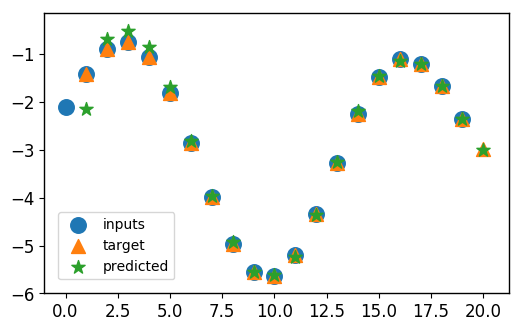

In [15]:
plt.scatter(np.arange(n_steps), X_new, marker='o', s=125, label='inputs')
plt.scatter(np.arange(n_steps) + 1, X_target, marker='^', s=100, label='target')
plt.scatter(np.arange(n_steps) + 1, y_pred, marker='*', s=100, label='predicted')
plt.legend()

# Below we work with real temperature data

The records consist of the mean temperature in Boston for each week over a 30-week period (n_steps). The target is the mean temperature the week after the window or the 31st week. Our training data are intervals taken over a 5 year period or 261 weeks.

In [16]:
import pandas as pd

In [17]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
bos_wthr.head(3).transpose()

,0,1,2
EST,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
Max TemperatureF,33,41,37
Mean TemperatureF,28,36,30
Min TemperatureF,22,31,22
Max Dew PointF,16,17,36
MeanDew PointF,8,15,20
Min DewpointF,5,11,8
Max Humidity,53,53,100
Mean Humidity,43,45,72
Min Humidity,32,37,43


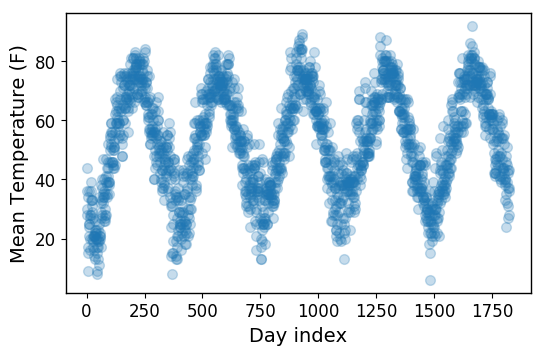

In [18]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.xlabel('Day index')
plt.ylabel('Mean Temperature (F)')

Let's create a simple ML regression model to predict temperature the next week based on the mean temperature the previous n weeks.

Compute the mean temperature for each week over the five year period:

In [19]:
bos_wthr['week'] = bos_wthr.index / 7
T_week = bos_wthr.groupby('week')['Mean TemperatureF'].mean()

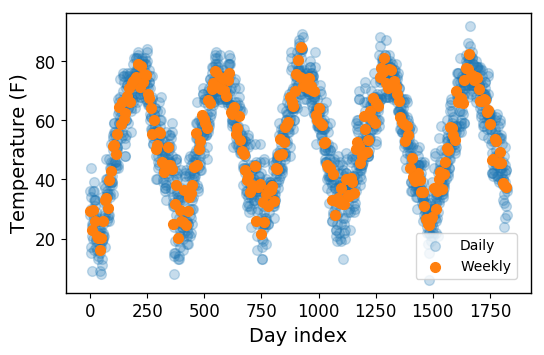

In [20]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25, label='Daily')
plt.scatter(T_week.index * 7, T_week.values, label='Weekly')
plt.xlabel('Day index')
plt.ylabel('Temperature (F)')
plt.legend()

In [21]:
n_steps = 30
def get_features_and_target(batch_size):
     n = T_week.size
     arr = []
     for _ in xrange(batch_size):
          rand_idx = np.random.choice(np.arange(0, n - n_steps - 1))
          arr.append(T_week[rand_idx:rand_idx + n_steps + 1]) # last value is the target
     return np.array(arr)

In [22]:
train = get_features_and_target(batch_size=35)
test = get_features_and_target(batch_size=20)

In [23]:
col_names = ['week_' + str(i) for i in range(n_steps)] + ['target']
df_train = pd.DataFrame(train, columns=col_names)
df_test = pd.DataFrame(test, columns=col_names)

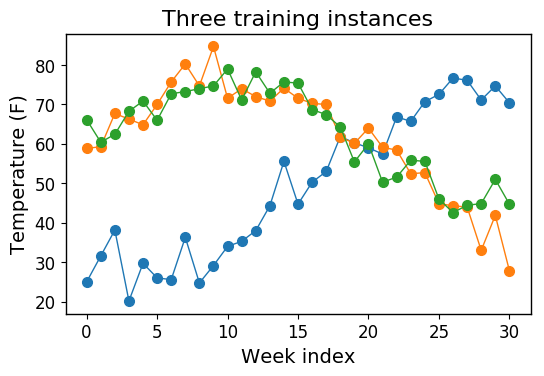

In [24]:
plt.plot(df_train.iloc[0].values, marker='o')
plt.plot(df_train.iloc[1].values, marker='o')
plt.plot(df_train.iloc[2].values, marker='o')
plt.xlabel('Week index')
plt.ylabel('Temperature (F)')
plt.title('Three training instances')

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg = linreg.fit(df_train.iloc[:,:-1], df_train.target)
print "rmse =", np.sqrt(mean_squared_error(df_test.target, linreg.predict(df_test.iloc[:,:-1])))
print "R2 =", r2_score(df_test.target, linreg.predict(df_test.iloc[:,:-1]))

rmse = 11.4571403727
R2 = 0.551493429652


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)
rf = rf.fit(df_train.iloc[:,:-1], df_train.target)
print "rmse =", np.sqrt(mean_squared_error(df_test.target, rf.predict(df_test.iloc[:,:-1])))
print "R2 =", r2_score(df_test.target, rf.predict(df_test.iloc[:,:-1]))

rmse = 4.43477330714
R2 = 0.932801560002


#### Now the RNN model

In [27]:
tf.reset_default_graph()

In [28]:
n_steps = 30 # weeks
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [29]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_outputs))

In [30]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(basic_cell, output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [31]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_op = optimizer.minimize(loss)

In [32]:
init = tf.global_variables_initializer()

In [33]:
def fetch_batch(batch_size):
     # could be done with numpy vector operations (see Geron)
     a_batch = []
     b_batch = []
     for _ in range(batch_size):
          rnd_index = np.random.choice(np.arange(1, T_week.size - n_steps))
          a_batch.append(T_week[rnd_index - 1: rnd_index + n_steps - 1].values.reshape(-1, 1))
          b_batch.append(T_week[rnd_index: rnd_index + n_steps].values.reshape(-1, 1))
     return np.asarray(a_batch), np.asarray(b_batch)

In [34]:
# make test set
a_test = []
b_test = []
for i in range(df_test.shape[0]):
     a_test.append(df_test.iloc[i,:-1].values.reshape(-1, 1))
     b_test.append(df_test.iloc[i,1:].values.reshape(-1, 1))
a_test = np.asarray(a_test)
b_test = np.asarray(b_test)

In [35]:
n_iterations = 15000
with tf.Session() as sess:
     init.run()
     for iteration in range(n_iterations + 1):
          X_batch, y_batch = fetch_batch(batch_size=35)
          sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
          if iteration % 1000 == 0:
               mse = loss.eval(feed_dict={X:a_test, y:b_test})
               print(iteration, "  MSE:", mse)
     idx = 100
     X_new = T_week[idx:idx + n_steps].values.reshape(1, n_steps, 1)
     X_target = T_week[idx + 1:idx + n_steps + 1]
     y_pred = sess.run(outputs, feed_dict={X:X_new})

(0, '  MSE:', 2003.2069)
(1000, '  MSE:', 13.94637)
(2000, '  MSE:', 11.335876)
(3000, '  MSE:', 11.320208)
(4000, '  MSE:', 9.5709867)
(5000, '  MSE:', 8.5531054)
(6000, '  MSE:', 8.2554169)
(7000, '  MSE:', 8.1453609)
(8000, '  MSE:', 7.8891487)
(9000, '  MSE:', 7.6237111)
(10000, '  MSE:', 7.1955647)
(11000, '  MSE:', 7.2002969)
(12000, '  MSE:', 7.0553761)
(13000, '  MSE:', 6.7512498)
(14000, '  MSE:', 6.6920719)
(15000, '  MSE:', 6.3450136)


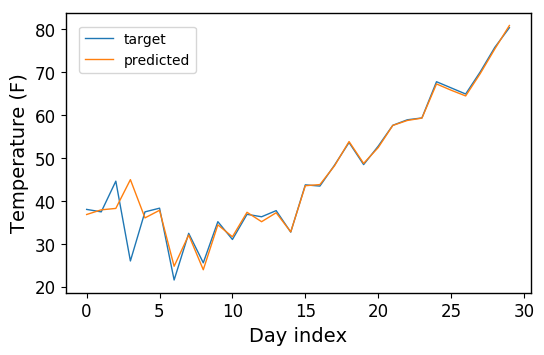

In [36]:
plt.plot(X_target.values, label='target')
plt.plot(y_pred.flatten(), label='predicted')
plt.legend()
plt.xlabel('Day index')
plt.ylabel('Temperature (F)')

The random forest model and the RNN give similar MSE values. One could try to optimize the RNN by varying the number of neurons, adding more layers, or applying dropout. Given how little data there is we will not do this.